In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [13]:
df_released = pd.read_csv('games_released_integer.csv')
df_reviews = pd.read_csv('Result_9.csv')
df_price = pd.read_csv('Result_12.csv')
df_playtime = pd.read_csv('Result_13.csv')
df_ratio = pd.read_csv('Result_14.csv')
df_released = df_released.sort_values('release_year')
df_reviews_top = df_reviews.sort_values('total_reviews', ascending=False).head(20)


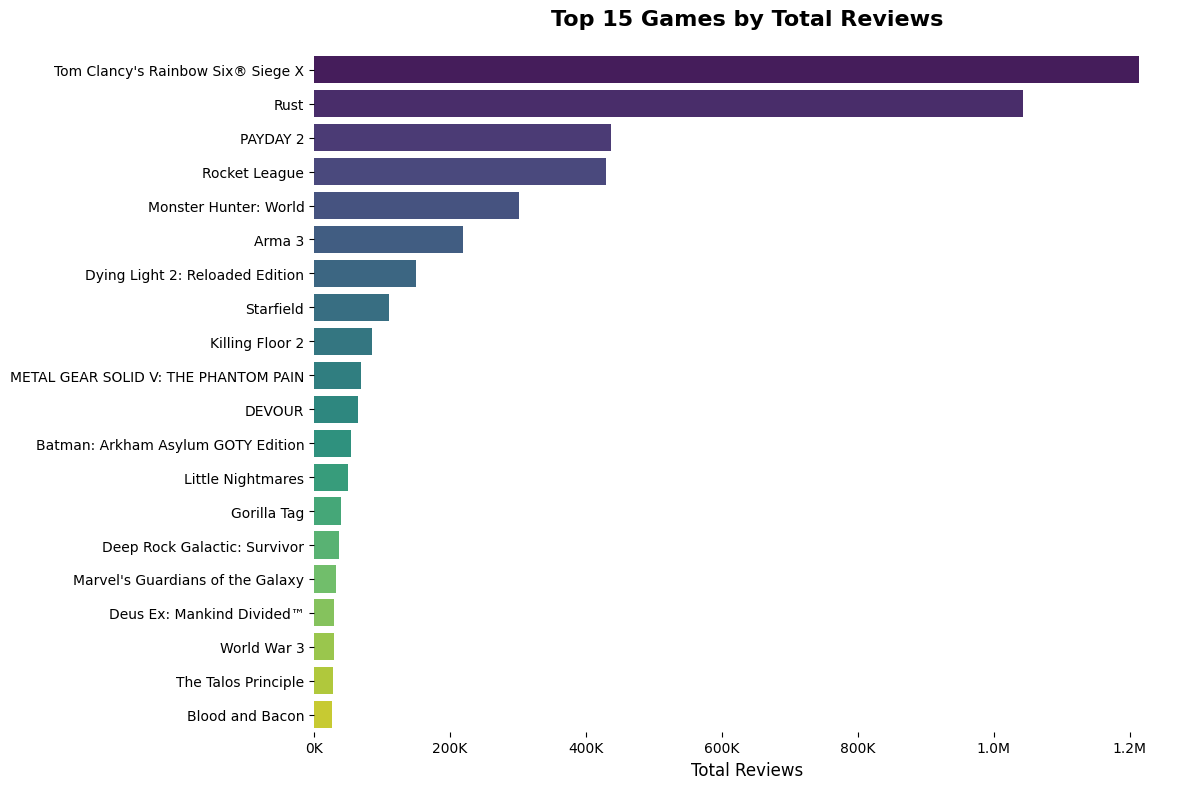

In [18]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=df_reviews_top,
    x='total_reviews',
    y='name_from_applist',
    palette='viridis',
    hue='name_from_applist',
    dodge=False
)
if ax.legend_:
    ax.legend_.remove()

plt.title('Top 15 Games by Total Reviews', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Total Reviews', fontsize=12)
plt.ylabel('')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1e6:.1f}M' if x >= 1e6 else f'{x / 1e3:.0f}K'))
sns.despine(left=True, bottom=True)
plt.tight_layout()

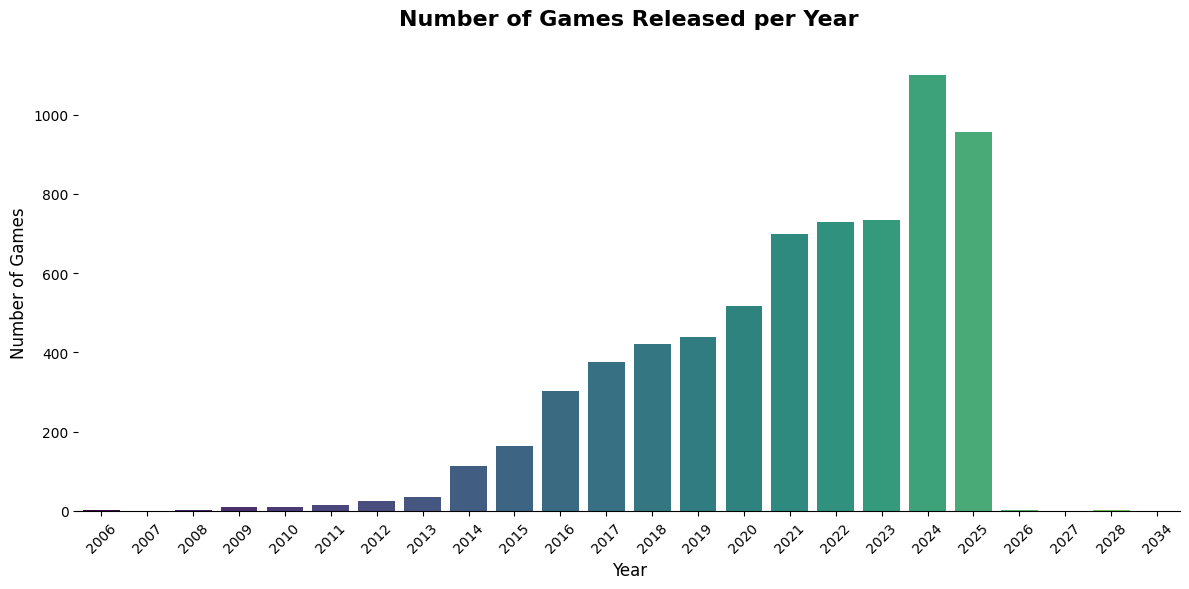

In [26]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=df_released_sorted,
    x='release_year',
    y='games_released',
    palette='viridis',
    hue='release_year',
    dodge=False
)

if ax.legend_:
    ax.legend_.remove()

plt.title('Number of Games Released per Year', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.xticks(rotation=45)
sns.despine(left=True)
plt.tight_layout()
plt.show()


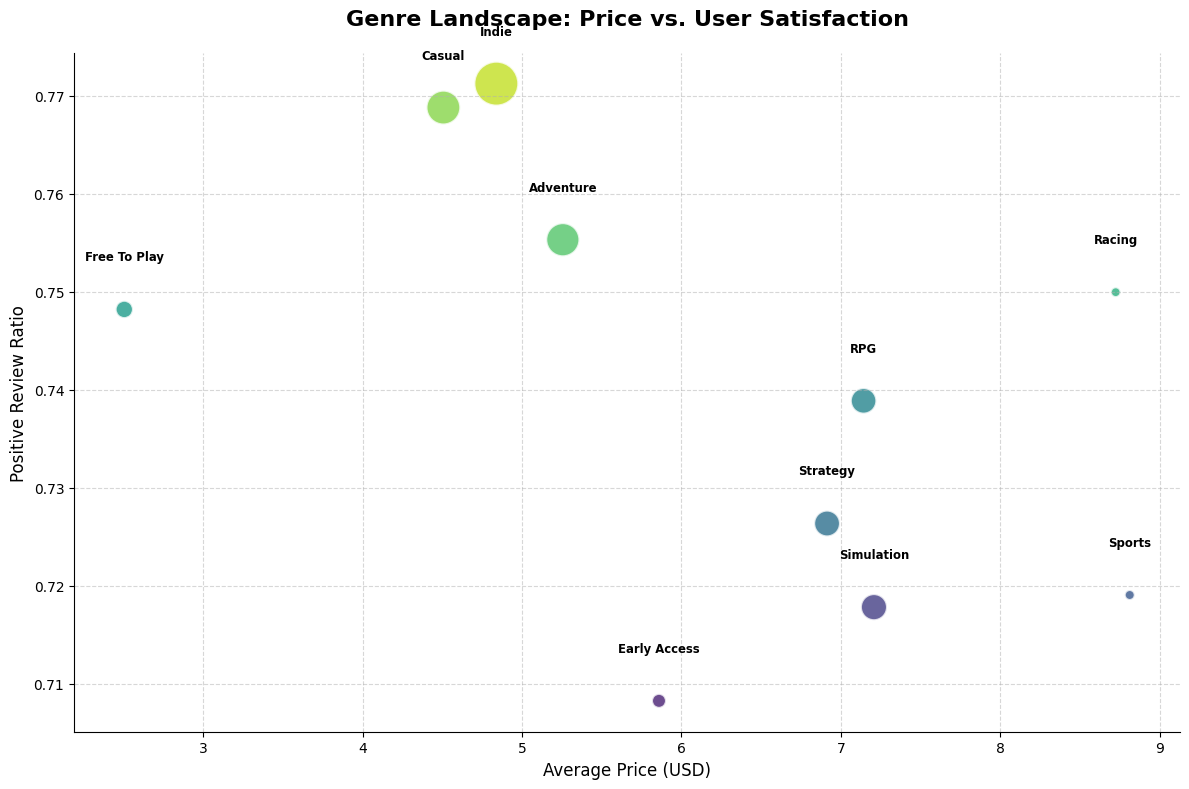

In [28]:
df_genre_sorted = df_genre.sort_values('avg_positive_ratio', ascending=True)
hue_order = df_genre_sorted['genre_description'].tolist()

plt.figure(figsize=(12, 8))

ax = sns.scatterplot(
    data=df_genre_sorted,
    x='avg_price_usd',
    y='avg_positive_ratio',
    size='games_count',
    sizes=(50, 1000),
    hue='genre_description',
    hue_order=hue_order,
    palette='viridis',
    alpha=0.8,
    edgecolor='w',
    linewidth=1.5
)

if ax.legend_:
    ax.legend_.remove()

for i in range(len(df_genre_sorted)):
    row = df_genre_sorted.iloc[i]
    ax.text(
        row['avg_price_usd'],
        row['avg_positive_ratio'] + 0.005,
        row['genre_description'],
        horizontalalignment='center',
        size='small',
        color='black',
        weight='semibold'
    )

plt.title('Genre Landscape: Price vs. User Satisfaction', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Average Price (USD)', fontsize=12)
plt.ylabel('Positive Review Ratio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()